In [86]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


In [87]:
od.download("https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")


Skipping, found downloaded files in ".\creditcardfraud" (use force=True to force download)


In [88]:
dataset = pd.read_csv('./creditcardfraud/creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [89]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [90]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [91]:
dataset.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344


In [92]:
dataset.shape

(284807, 31)

In [93]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [199]:
fraud_cases=len(dataset[dataset['Class']==1])
print(' Ilosc fraudow:',fraud_cases)

 Ilosc fraudow: 492


In [200]:
non_fraud_cases=len(dataset[dataset['Class']==0])
print('Ilosc nie fraudow:',non_fraud_cases)

Ilosc nie fraudow: 284315


In [96]:
fraud=dataset[dataset['Class']==1]

In [97]:
genuine=dataset[dataset['Class']==0]

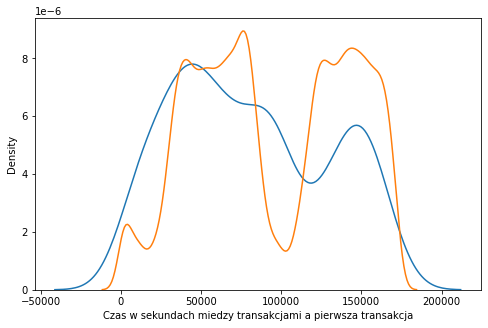

In [202]:
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(genuine['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Czas w sekundach miedzy transakcjami a pierwsza transakcja')
plt.show()

In [99]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [100]:
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

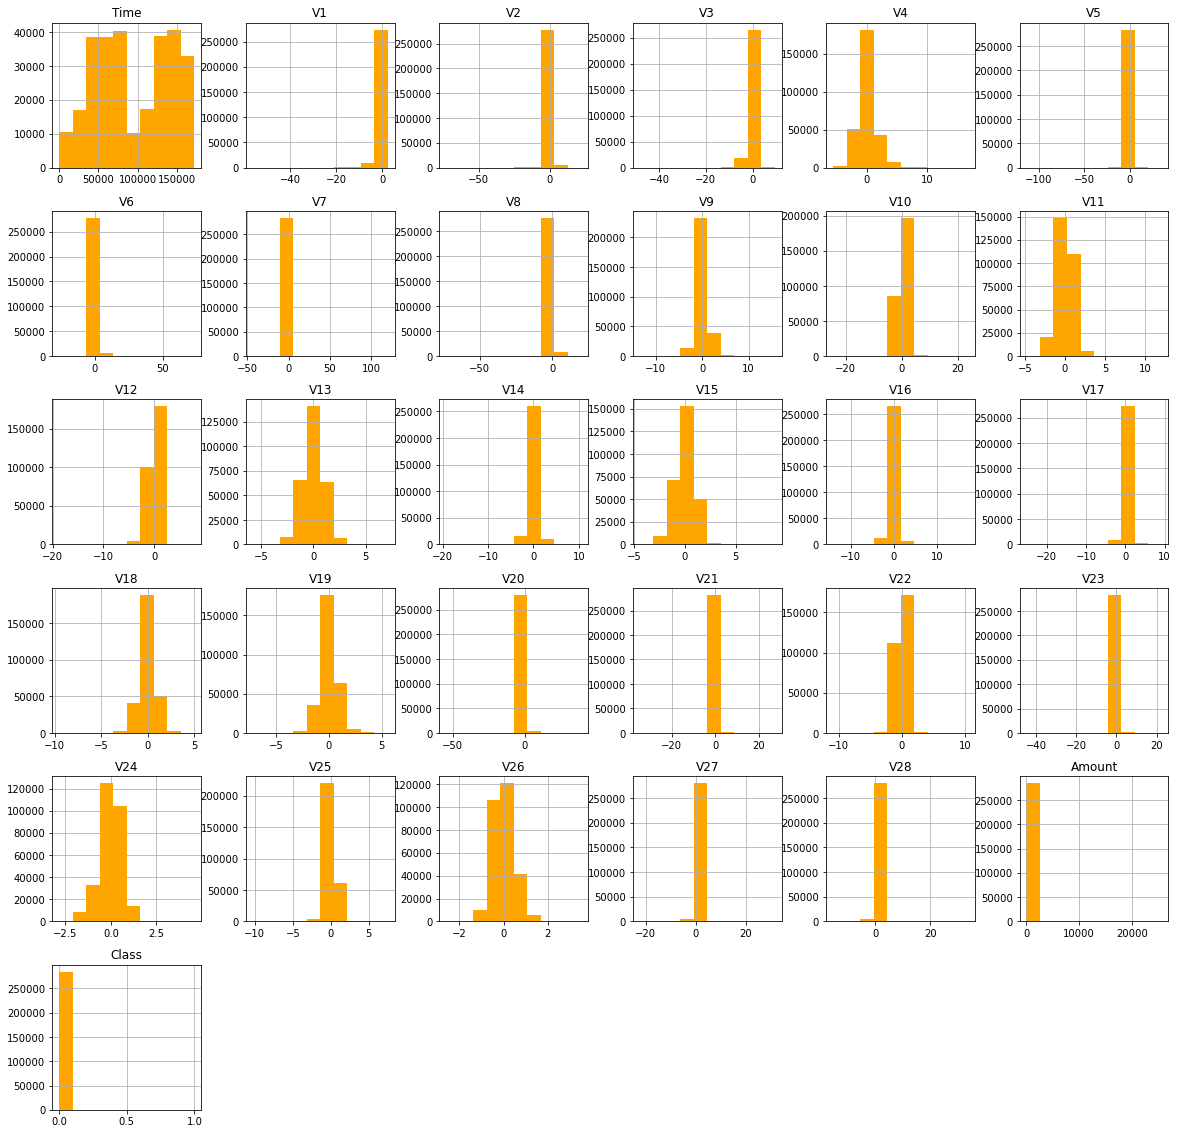

In [101]:
dataset.hist(figsize=(20,20),color='orange')
plt.show()

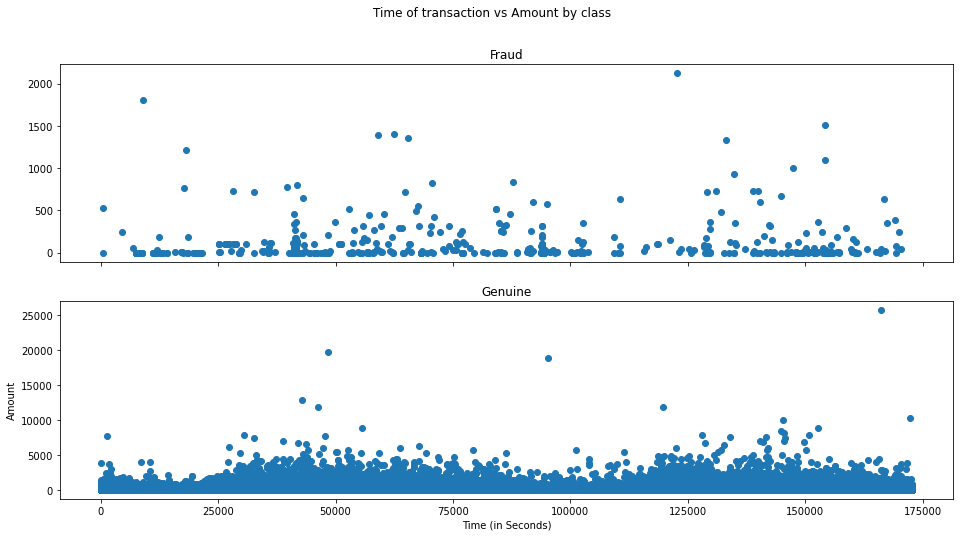

In [102]:
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

<AxesSubplot:>

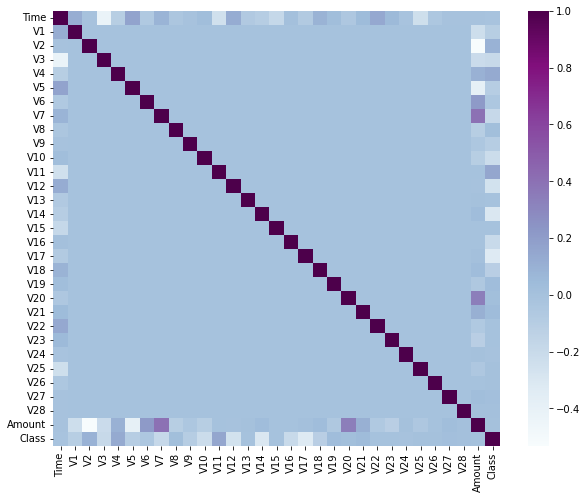

In [103]:
plt.figure(figsize=(10,8))
corr=dataset.corr()
sns.heatmap(corr,cmap='BuPu')

Model Random Forest Classifier 

In [104]:
X=dataset.drop(['Class'],axis=1)
y=dataset['Class']

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123)

In [193]:
rfc=RandomForestClassifier()
modelrfc =rfc.fit(X_train,y_train)
prediction = modelrfc.predict(X_test)

Cut - off
Ważniejsze jest lepsze wykrywanie i lepiej dopisać nie frauda do frauda niż odwrotnie ponieważ pozwoli to na lepsze wykrycie fraudów, a jest to bezpieczne dla banku gdyż i tak kierowane jest to jeszcze do ręcznej analizy przez pracownika.

In [203]:
rfc=RandomForestClassifier()
modelrfc =rfc.fit(X_train,y_train)
prediction = modelrfc.predict(X_test)
pred_proba_df = pd.DataFrame(modelrfc.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** Dla i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    print()
    test_accuracy = accuracy_score(y_test.to_numpy().reshape(y_test.to_numpy().size,1), Y_test_pred.iloc[:,1].to_numpy().reshape(Y_test_pred.iloc[:,1].to_numpy().size,1))
    print('Nasz testowy accuracy to {}'.format(test_accuracy))

    print(confusion_matrix(y_test.to_numpy().reshape(y_test.to_numpy().size,1), Y_test_pred.iloc[:,1].to_numpy().reshape(Y_test_pred.iloc[:,1].to_numpy().size,1)))


******** Dla i = 0.05 ******

Nasz testowy accuracy to 0.9987711105649381
[[85200    83]
 [   22   138]]

******** Dla i = 0.1 ******

Nasz testowy accuracy to 0.9991105181231933
[[85231    52]
 [   24   136]]

******** Dla i = 0.15 ******

Nasz testowy accuracy to 0.9992509626300574
[[85243    40]
 [   24   136]]

******** Dla i = 0.2 ******

Nasz testowy accuracy to 0.9992743700478681
[[85245    38]
 [   24   136]]

******** Dla i = 0.25 ******

Nasz testowy accuracy to 0.9993328885923949
[[85251    32]
 [   25   135]]

******** Dla i = 0.3 ******

Nasz testowy accuracy to 0.999403110845827
[[85258    25]
 [   26   134]]

******** Dla i = 0.35 ******

Nasz testowy accuracy to 0.9994616293903538
[[85264    19]
 [   27   133]]

******** Dla i = 0.4 ******

Nasz testowy accuracy to 0.9995084442259752
[[85270    13]
 [   29   131]]

******** Dla i = 0.45 ******

Nasz testowy accuracy to 0.9995435553526912
[[85275     8]
 [   31   129]]

******** Dla i = 0.5 ******

Nasz testowy accuracy

In [107]:
accuracy_score(y_test,prediction)

0.9995552590615966

SVM

In [175]:
svm = SVC(probability=True)
model = svm.fit(X_train, y_train)
prediction = model.predict(X_test)
accuracy_score(y_test,prediction)

0.9981274065751436

Model Logistic Regression

In [109]:
X1=dataset.drop(['Class'],axis=1)
y1=dataset['Class']

In [110]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=123)

In [111]:
lr=LogisticRegression()
model2=lr.fit(X1_train,y1_train)
prediction2=model2.predict(X1_test)

In [112]:
accuracy_score(y1_test,prediction2)

0.9989817773252344

Model Decision Tree Regressor

In [113]:
X2=dataset.drop(['Class'],axis=1)
y2=dataset['Class']

In [114]:
dt=DecisionTreeRegressor()

In [115]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=123)

In [116]:
model3=dt.fit(X2_train,y2_train)
prediction3=model3.predict(X2_test)
accuracy_score(y2_test,prediction3)

0.9991924440855307

Oversampling

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
X.drop('Time', axis=1, inplace=True)

In [119]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [120]:
scaler = StandardScaler()

X3_train['Amount'] = scaler.fit_transform(X3_train[['Amount']])

X3_train.head()



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,...,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,...,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,...,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,...,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,...,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


In [121]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter



In [122]:
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X3_train, y3_train)


In [195]:
print('Przed:-',Counter(y3_train))

print('Nowa klasa:-',Counter(y_train_ros))

Przed:- Counter({0: 227449, 1: 396})
Nowa klasa:- Counter({0: 227449, 1: 227449})


In [124]:
folds = KFold(n_splits=5, shuffle=True, random_state=4)

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [125]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.841909,0.207731,0.034208,0.003545,0.01,{'C': 0.01},0.988811,0.988582,0.988627,0.988906,...,0.988730,0.000118,6,0.988682,0.988721,0.988747,0.988771,0.988777,0.988740,0.000035
1,4.313060,0.319451,0.030806,0.000749,0.1,{'C': 0.1},0.988935,0.988752,0.988792,0.989067,...,0.988885,0.000112,5,0.988836,0.988863,0.988912,0.988947,0.988931,0.988898,0.000042
2,4.469808,0.452184,0.031213,0.002037,1,{'C': 1},0.988950,0.988772,0.988804,0.989087,...,0.988902,0.000112,4,0.988853,0.988883,0.988927,0.988966,0.988946,0.988915,0.000041
3,4.148122,0.342536,0.029810,0.001467,10,{'C': 10},0.988950,0.988774,0.988807,0.989087,...,0.988903,0.000111,3,0.988854,0.988885,0.988928,0.988966,0.988948,0.988916,0.000041
4,4.649068,0.194178,0.029806,0.001326,100,{'C': 100},0.988950,0.988774,0.988808,0.989087,...,0.988904,0.000111,2,0.988854,0.988884,0.988929,0.988966,0.988948,0.988916,0.000041
5,4.430009,0.268968,0.030407,0.001854,1000,{'C': 1000},0.988951,0.988774,0.988808,0.989087,...,0.988904,0.000111,1,0.988855,0.988884,0.988929,0.988965,0.988948,0.988916,0.000041


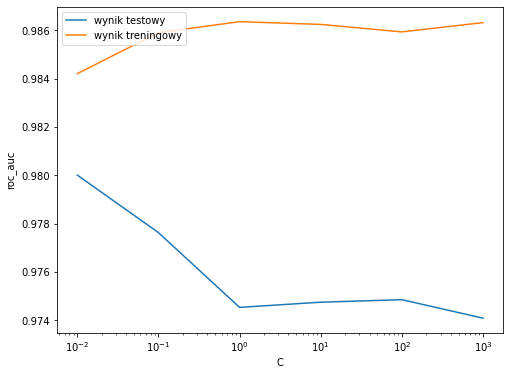

In [204]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['wynik testowy', 'wynik treningowy'], loc='upper left')
plt.xscale('log')

In [196]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" Najwyższy wynik testu roc_auc to {0} przy C = {1}".format(best_score, best_C))

 Najwyższy wynik testu roc_auc to 0.9800138686835951 przy C = 0.01


In [128]:
logistic_bal_ros = LogisticRegression(C=0.1)

In [129]:
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)

In [130]:
y_train_pred = logistic_bal_ros_model.predict(X_train_ros)

In [131]:
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[222807   4642]
 [ 17073 210376]]


In [132]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [133]:

print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))


print("Sensitivity:-",TP / float(TP+FN))


print("Specificity:-", TN / float(TN+FP))


print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

Accuracy:- 0.9522640240229678
Sensitivity:- 0.9249370188481814
Specificity:- 0.9795910291977542
F1-Score:- 0.9509228936847267


In [134]:
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [135]:
y_train_pred_proba = logistic_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [136]:
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9889009163653274

In [137]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

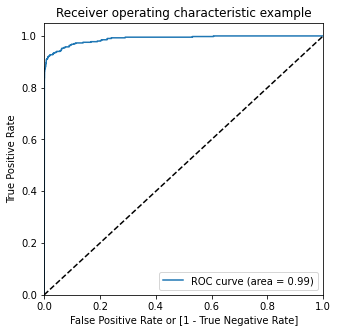

In [138]:
draw_roc(y_train_ros, y_train_pred_proba)

In [139]:
y_test_pred = logistic_bal_ros_model.predict(X3_test)

In [140]:
confusion = metrics.confusion_matrix(y3_test, y_test_pred)
print(confusion)

[[ 5988 50878]
 [    4    92]]


In [141]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [142]:
print("Accuracy:-",metrics.accuracy_score(y3_test, y_test_pred))
print("Sensitivity:-",TP / float(TP+FN))
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.1067378252168112
Sensitivity:- 0.9583333333333334
Specificity:- 0.10530017936904301


In [143]:
print(classification_report(y3_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.11      0.19     56866
           1       0.00      0.96      0.00        96

    accuracy                           0.11     56962
   macro avg       0.50      0.53      0.10     56962
weighted avg       1.00      0.11      0.19     56962



In [144]:
y_test_pred_proba = logistic_bal_ros_model.predict_proba(X3_test)[:,1]

In [145]:
auc = metrics.roc_auc_score(y3_test, y_test_pred_proba)
auc

0.5936559374963364

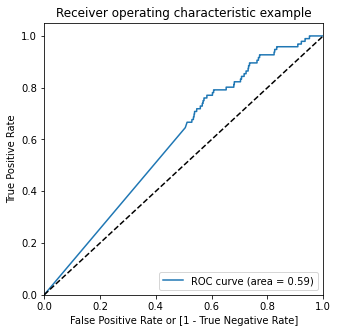

In [146]:
draw_roc(y3_test, y_test_pred_proba)


Podumowanie modelu

Train set
Accuracy = 0.99
Sensitivity = 0.70
Specificity = 0.99
F1-Score = 0.76
ROC = 0.99

Test set:
Accuracy = 0.99
Sensitivity = 0.77
Specificity = 0.99
F1-Score = 0.65
ROC = 0.97


Undersampling Technique

In [147]:
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X, y)

In [197]:
print('Przed:-',Counter(y_train))
print('Nowa klasa:-',Counter(y_train_rus))

Przed:- Counter({0: 199032, 1: 332})
Nowa klasa:- Counter({0: 492, 1: 492})


In [149]:
folds = KFold(n_splits=5, shuffle=True, random_state=4)


params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}


model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 


model_cv.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [150]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.030806,0.003372,0.003002,9.122432e-07,0.01,{'C': 0.01},0.990517,0.979503,0.970972,0.979901,...,0.980014,0.006214,1,0.982705,0.982526,0.986149,0.984746,0.984926,0.984210,0.001390
1,0.030007,0.000633,0.003200,3.993530e-04,0.1,{'C': 0.1},0.985261,0.977329,0.967759,0.980004,...,0.977635,0.005682,2,0.985178,0.983921,0.987958,0.986360,0.986105,0.985905,0.001336
2,0.030207,0.000399,0.002801,4.000194e-04,1,{'C': 1},0.972377,0.977536,0.964234,0.980623,...,0.974539,0.005802,5,0.986838,0.983359,0.987686,0.986212,0.987715,0.986362,0.001603
3,0.030407,0.001020,0.003201,4.019028e-04,10,{'C': 10},0.971655,0.977433,0.968692,0.976500,...,0.974753,0.003975,4,0.987025,0.983424,0.987744,0.986444,0.986601,0.986248,0.001482
4,0.030607,0.001019,0.003002,2.711690e-06,100,{'C': 100},0.970315,0.979089,0.966929,0.977737,...,0.974857,0.005261,3,0.985837,0.983734,0.987273,0.986121,0.986730,0.985939,0.001209
5,0.030808,0.001164,0.003000,6.323367e-04,1000,{'C': 1000},0.969388,0.977433,0.968381,0.976397,...,0.974092,0.004336,6,0.986677,0.983353,0.987479,0.986412,0.987696,0.986323,0.001561


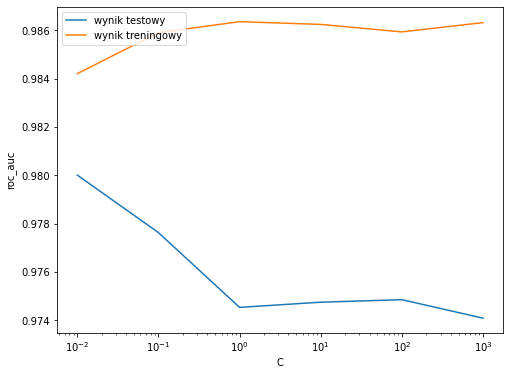

In [205]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['wynik testowy', 'wynik treningowy'], loc='upper left')
plt.xscale('log')

In [198]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" Najwyższy wynik testu roc_auc to {0} przy C = {1}".format(best_score, best_C))

 Najwyższy wynik testu roc_auc to 0.9800138686835951 przy C = 0.01


In [153]:
logistic_bal_rus = LogisticRegression(C=0.1)

In [154]:
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_rus, y_train_rus)

In [155]:
y_train_pred = logistic_bal_rus_model.predict(X_train_rus)

In [156]:
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[481  11]
 [ 44 448]]


In [157]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [158]:
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))


print("Sensitivity:-",TP / float(TP+FN))


print("Specificity:-", TN / float(TN+FP))

print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.9441056910569106
Sensitivity:- 0.9105691056910569
Specificity:- 0.9776422764227642
F1-Score:- 0.9421661409043114


In [159]:
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       492
           1       0.98      0.91      0.94       492

    accuracy                           0.94       984
   macro avg       0.95      0.94      0.94       984
weighted avg       0.95      0.94      0.94       984



In [160]:
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [161]:
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9856277678630444

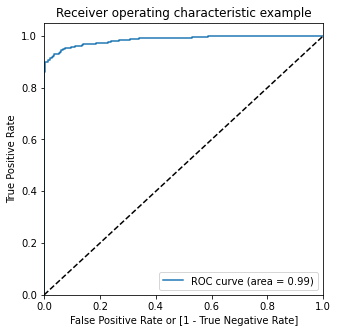

In [162]:
draw_roc(y_train_rus, y_train_pred_proba)

In [163]:
y_test_pred = logistic_bal_rus_model.predict(X3_test)

In [164]:
confusion = metrics.confusion_matrix(y3_test, y_test_pred)
print(confusion)

[[55406  1460]
 [   10    86]]


In [165]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [166]:
print("Accuracy:-",metrics.accuracy_score(y3_test, y_test_pred))

print("Sensitivity:-",TP / float(TP+FN))

print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9741933218636986
Sensitivity:- 0.8958333333333334
Specificity:- 0.9743256075686703


In [167]:
print(classification_report(y3_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.06      0.90      0.10        96

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [168]:
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X3_test)[:,1]

In [169]:
auc = metrics.roc_auc_score(y3_test, y_test_pred_proba)
auc

0.9798272107527638

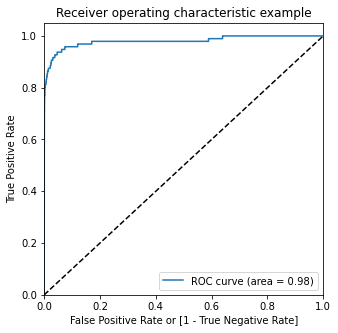

In [170]:
draw_roc(y3_test, y_test_pred_proba)

Podsumowanie Modelu

Train set
Accuracy = 0.95
Sensitivity = 0.92
Specificity = 0.98
ROC = 0.99

Test set:
Accuracy = 0.97
Sensitivity = 0.86
Specificity = 0.97
ROC = 0.96

In [192]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_model = pca.fit(X_train)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[9.99972305e-01 2.76822916e-05]
[21202971.45642038   111558.78151494]


PCA(n_components=2)